### Bài tập:
Hãy tạo mới bảng có tên STOCK có các cột như sau:
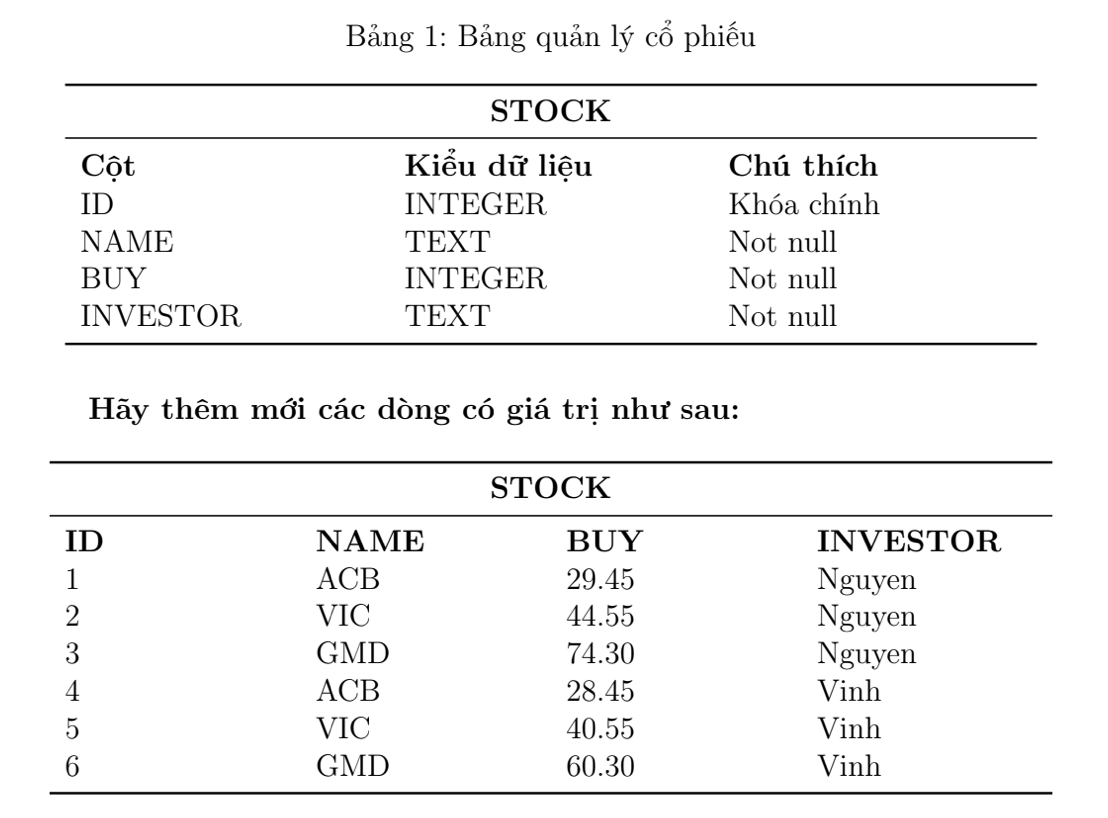

In [1]:
import sqlite3
import pandas as pd

In [2]:
con = sqlite3.connect('sqlite2.db')
cur = con.cursor()

In [3]:
cur.execute("""
CREATE TABLE STOCK (
    ID INTEGER PRIMARY KEY,
    NAME TEXT NOT NULL,
    BUY INTERGER NOT NULL,
    INVESTOR TEXT NOT NULL
);
""")

In [5]:
cur.execute("""
INSERT INTO STOCK(ID, NAME, BUY, INVESTOR)
VALUES
    ('1', 'ACB', '29.45', 'Nguyen'),
    ('2', 'VIC', '44.55', 'Nguyen'),
    ('3', 'GMD', '74.30', 'Nguyen'),
    ('4', 'ACB', '28.45', 'Vinh'),
    ('5', 'VIC', '40.55', 'Vinh'),
    ('6', 'GMD', '60.30', 'Vinh')
""")
con.commit()

In [7]:
data = pd.read_sql_query("SELECT * FROM STOCK", con)
print(data)

   ID NAME    BUY INVESTOR
0   1  ACB  29.45   Nguyen
1   2  VIC  44.55   Nguyen
2   3  GMD  74.30   Nguyen
3   4  ACB  28.45     Vinh
4   5  VIC  40.55     Vinh
5   6  GMD  60.30     Vinh


In [10]:
# Câu 1: In ra kết quả thống kê tổng giá mua (BUY) của bảng STOCK:
query = """
SELECT SUM(BUY) AS TOTAL_BUY
FROM STOCK;
"""
data_sum = pd.read_sql_query(query, con)
print(data_sum)

   TOTAL_BUY
0      277.6


In [13]:
# Câu 2: Thống kê mã cổ phiếu có giá mua (BUY) lớn nhất theo nhà đầu tư (INVESTOR):
query = """
SELECT INVESTOR, NAME, MAX(BUY) AS MAX_PRICE
FROM STOCK
GROUP BY INVESTOR;
"""
data_max = pd.read_sql_query(query, con)
print(data_max)

  INVESTOR NAME  MAX_PRICE
0   Nguyen  GMD       74.3
1     Vinh  GMD       60.3
